In [ ]:
# Config the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer

In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/digit-recognizer.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
import pandas as pd

In [ ]:
X = pd.read_csv('train.csv')  # Load the data into the DataFrame X
y = X['label']  # Extract the 'label' column into y
X = X.drop(['label'], axis=1)  # Remove the 'label' column from X

In [ ]:
X.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head(3)

,label
0,1
1,0
2,1


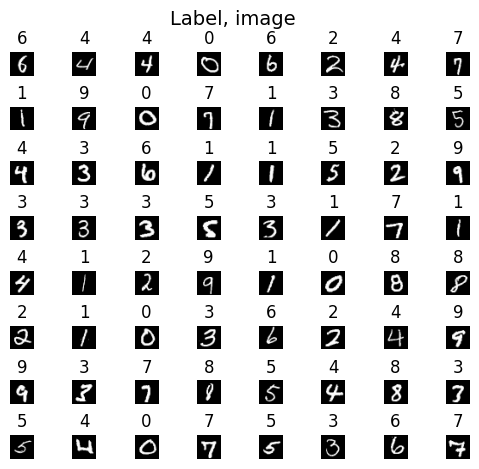

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]


for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    # Reshape to (28, 28) to match the MNIST image dimensions
    X_random_reshaped = X.iloc[random_index].values.reshape((28,28)) # Updated the reshape dimensions to 28x28

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index]) # Updated to access y using integer index
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

plt.show() # Adding plt.show() to display the plot

In [ ]:
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [   tf.keras.layers.InputLayer((784,)),
        Dense(50, activation = "relu", name="L1"),
        Dense(20, activation = "relu", name="L2"),
        Dense(10, activation = "linear", name="L3"),
        ], name = "my_model"
)

In [ ]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L3 (Dense)                           │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,480 (158.12 KB)

 Trainable params: 40,480 (158.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
[layer1, layer2, layer3] = model.layers

In [ ]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 50), b1 shape = (50,)
W2 shape = (50, 20), b2 shape = (20,)
W3 shape = (20, 10), b3 shape = (10,)


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
epochs_num = 100
history = model.fit(
    X,y,
    epochs = epochs_num
)

Epoch 1/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1720
Epoch 2/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1618
Epoch 3/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1468
Epoch 4/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1275
Epoch 5/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1191
Epoch 6/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1141
Epoch 7/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1051
Epoch 8/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1062
Epoch 9/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0965
Epoch 10/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0998
Epoch 11/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0949
Epoch 12/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0825
Epoch 13/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0780
Epoch 14/100
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0800
Epoch 15/100
13

In [ ]:
# Access the 'loss' values from the history
loss_values = history.history['loss']

# Find the minimum loss value and its index
min_loss_value = min(loss_values)
min_loss_index = loss_values.index(min_loss_value)

# Print the minimum loss value and its index
print("Minimum loss value:", min_loss_value)
print("Index of minimum loss value:", min_loss_index)

Minimum loss value: 0.03499658778309822
Index of minimum loss value: 84


In [ ]:
epochs = [ i for i in range(1,101)]

In [ ]:
import seaborn as sns

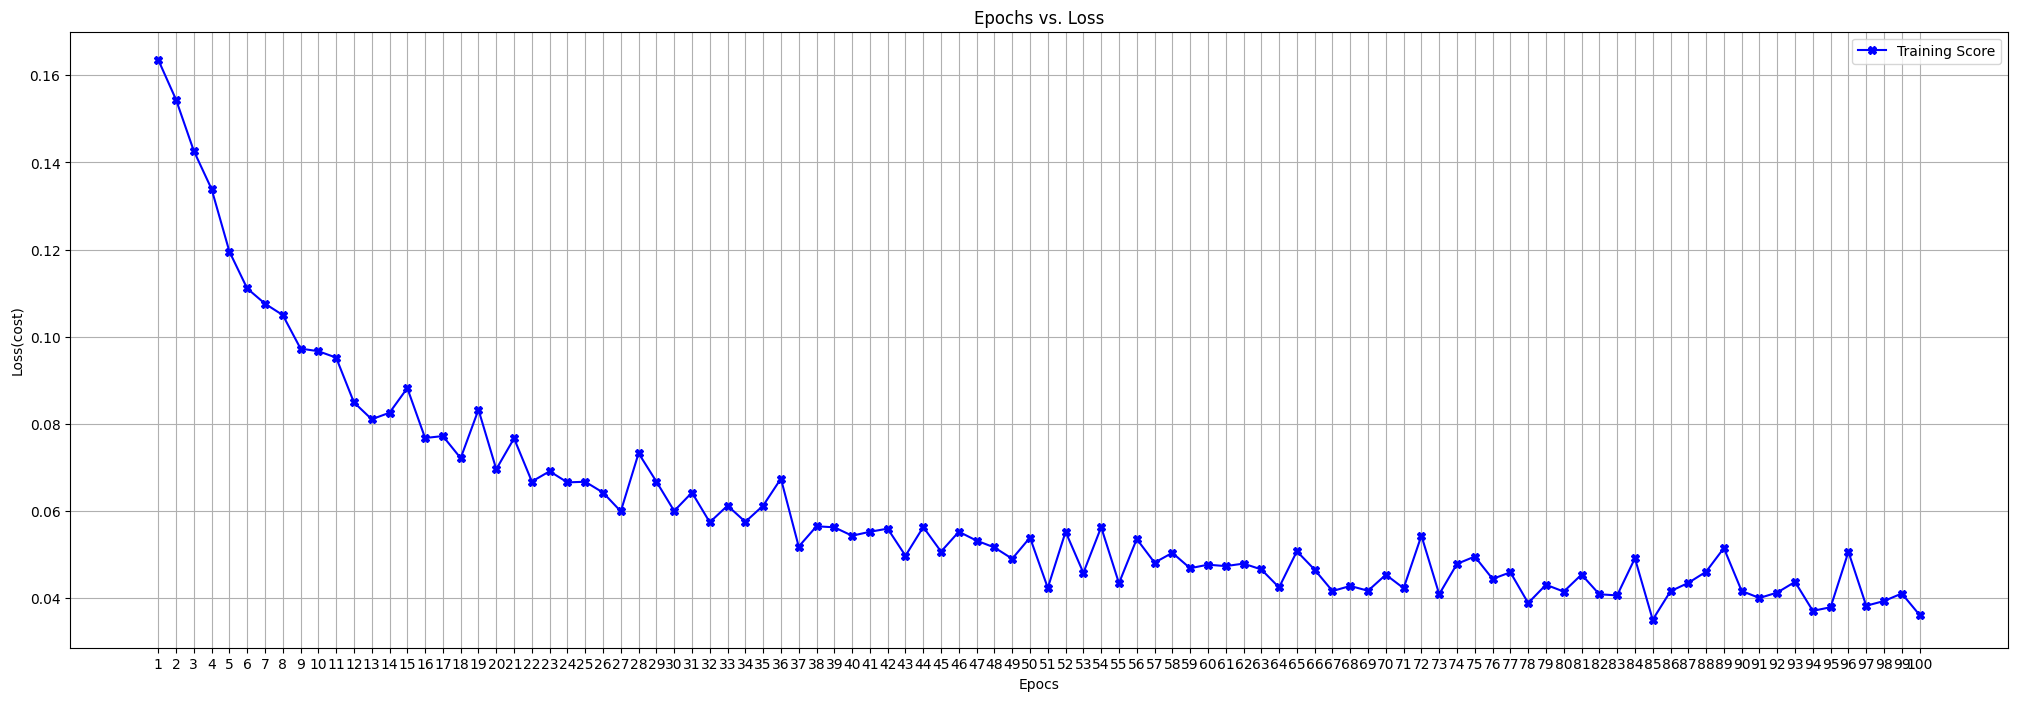

In [ ]:
plt.figure(figsize=(25, 8))
plt.plot(epochs,history.history["loss"], marker='X', label='Training Score', color='blue')
plt.title('Epochs vs. Loss')
plt.xlabel('Epocs')
plt.ylabel('Loss(cost)')
plt.xticks(epochs)  # Set x-ticks to be the iteration values
plt.grid()
plt.legend()
plt.show()

In [ ]:
def display_digit(digit):
    """
    Displays a digit from the MNIST dataset.

    Args:
        digit (pandas.Series or numpy.ndarray): A 1D array representing the digit image.
    """
    # Reshape the digit to a 28x28 matrix
    digit_image = digit.values.reshape(28, 28) if isinstance(digit, pd.Series) else digit.reshape(28, 28)

    # Display the image using matplotlib
    plt.imshow(digit_image, cmap='gray')
    plt.axis('off')
    plt.show()

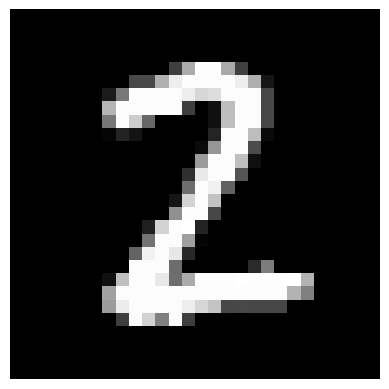

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
 predicting a Two: 
[[ 47.006065 193.77104  200.34427  178.64282  105.159874 145.53741
  143.4702   178.39229  139.32504  110.774574]]
 Largest Prediction index: 2


In [ ]:
image_of_two = X.iloc[22]
display_digit(image_of_two)

prediction = model.predict(image_of_two.values.reshape(1,784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [ ]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[0.0000000e+00 1.3953316e-03 9.9860471e-01 3.7546991e-10 0.0000000e+00
  1.5742701e-24 1.9920452e-25 2.9226013e-10 3.1555888e-27 0.0000000e+00]]
Total of predictions: 1.000


In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

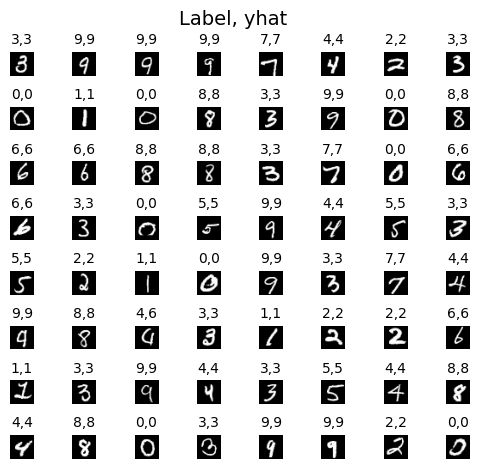

In [ ]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    # Reshape to (28, 28) to match the MNIST image dimensions
    X_random_reshaped = X.iloc[random_index].values.reshape((28,28)) # Updated the reshape dimensions to 28x28

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    # Use .iloc to access the row by its position
    prediction = model.predict(X.iloc[random_index].values.reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)



    # Display the label above the image
    # Access y using .iloc to be consistent
    ax.set_title(f"{y.iloc[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [ ]:
def display_errors(model, X, y):
    """
    Calculates and displays the number of errors the model makes on the dataset.

    Args:
        model: The trained machine learning model.
        X: The input features.
        y: The true labels.

    Returns:
        The number of errors.
    """
    # Get predictions for the dataset
    y_pred_probs = model.predict(X)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate the number of errors
    errors = np.sum(y_pred != y)

    return errors

# Now call the function
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
384 errors out of 42000 images


In [ ]:
384/42000 * 100

0.9142857142857144

In [ ]:
test = pd.read_csv('test.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

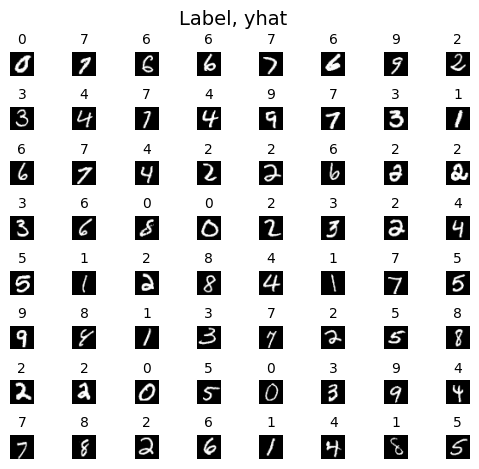

In [ ]:
m, n = test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    # Reshape to (28, 28) to match the MNIST image dimensions
    X_random_reshaped = test.iloc[random_index].values.reshape((28,28)) # Updated the reshape dimensions to 28x28

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    # Use .iloc to access the row by its position
    prediction_test = model.predict(test.iloc[random_index].values.reshape(1,784))
    prediction_p_test = tf.nn.softmax(prediction_test)
    yhat_test = np.argmax(prediction_p_test)



    # Display the label above the image
    # Access y using .iloc to be consistent
    ax.set_title(f"{yhat_test}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_probs = model.predict(X)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 99.08571428571429%


In [ ]:
#267